# demonstration of distributions changing as the parameters change

In [15]:
from __future__ import print_function,division
import pylab as pl
import matplotlib 
from matplotlib import animation
%pylab inline
pl.style.use("https://raw.githubusercontent.com/fedhere/DSPS/master/fbb.mplstyle")


Populating the interactive namespace from numpy and matplotlib


In [9]:
import scipy as sp
from scipy import stats

# Binomial distribution:

$k=\textstyle {n \choose k}\, p^k (1-p)^{n-k}$

parameters: 
    - n: number of tries
    - p: probability of success at each try
defines the probability of having N "successes" in a series of n independent identical success/failure experiment. The case of n=1 and p=0.5 is describe a fair coin toss. 

mean: np

variance: np*(1-p)

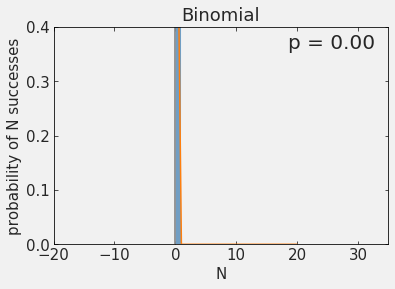

In [19]:
N = 20
ssize = 1000
t = np.linspace(0, N, N+1).astype(int)
y = np.zeros((N, ssize))
ls = np.zeros((21, len(t)))
ps = np.linspace(0, 1.0, N)
for i,j in enumerate(ps):
    y[i] = sp.stats.binom.rvs(n=N, p=j, size=ssize)
    ls[i] = sp.stats.binom.pmf(t, n=N, p=j)
    
fig, ax = pl.subplots();
ax.axis([-20, 35, 0, 0.4]);
y0 = np.histogram(y[0], bins=t, density=1)[0]

n, bins, patches = plt.hist(y0, bins=t, density=1, 
                            facecolor='SteelBlue', alpha=0.75);
l,= ax.plot(t, ls[i]);
texts = ax.text(0.70, 0.9,  'p = %.2f'%ps[0], transform=ax.transAxes, 
               fontsize=20)
ax.plot([0, 0], [0, 0.4], 'k-', alpha=0.5)
ax.set_title("Binomial")
ax.set_ylabel("probability of N successes")
ax.set_xlabel("N")
def animate(i):    
    n, _ = np.histogram(y[i], bins=t, density=1)
    for rect, h in zip(patches, n):
        rect.set_height(h)
        l.set_data(t, ls[i])
    texts.set_text('p = %.2f'%ps[i])
    return patches

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(y));
from IPython.display import HTML
HTML(ani.to_jshtml())

# Poisson distribution:
$k=\frac{\lambda^k}{k!} e^{-\lambda}$

parameters: 
    - lambda: number of tries
A discrete distribution that expresses the probability of a number of events
occurring in a fixed period of time if these events occur with a known average rate
and independently of the time since the last event. More here http://individual.utoronto.ca/zheli/poisson.pdf

mean: lambda

variance: lambda


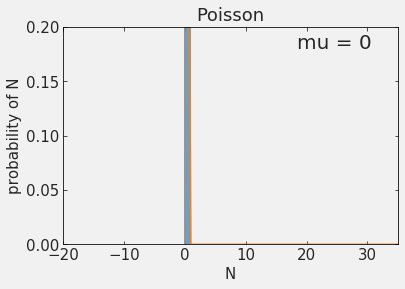

In [23]:
N=35
t = np.linspace(0, N, N+1).astype(int)
y = np.zeros((21, ssize))
ls = np.zeros((21, len(t)))
mus = np.linspace(0, 20, 21).astype(int)
for i,j in enumerate(mus):
    #print(mus[i])
    y[i] = sp.stats.poisson.rvs(size=ssize, mu=mus[i])
    ls[i] = sp.stats.poisson.pmf(t, mu=mus[i])
    #pl.figure()
    #pl.hist(y[i])
fig, ax = pl.subplots()
ax.axis([-20, N, 0, 0.2])
bins = t

y0 = np.histogram(y[0], bins=bins, density=1)[0]

n, bins, patches = plt.hist(y0, bins, density=1, 
                            facecolor='SteelBlue', alpha=0.75);
l,= ax.plot(t, ls[i])
texts = ax.text(0.70, 0.9,  'mu = %d'%mus[0], transform=ax.transAxes, 
               fontsize=20)
ax.plot([0, 0], [0, 0.4], 'k-', alpha=0.5)
ax.set_title("Poisson")
ax.set_ylabel("probability of N")
ax.set_xlabel("N")

def animate(i):    
    n, _ = np.histogram(y[i], bins=bins, density=1)
    for rect, h in zip(patches, n):
        rect.set_height(h)
        l.set_data(t, ls[i])
    texts.set_text('mu = %d'%mus[i])
    return patches

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(y))
from IPython.display import HTML
HTML(ani.to_jshtml())

# Gaussian 

$x= \frac{1}{\sigma\sqrt{2\pi}}\, e^{-\frac{(x - \mu)^2}{2 \sigma^2}}$

parameters:
    - mu: mean
    - sigma: standard deviation
It relates to the Central Limit Theorem:
(Under some conditions which include finite variance) the averages of samples 
of random variables independently drawn from _any_ distributions 
converge in distribution to the normal, i.e., 
they become normally distributed with mean equal to the expected value and 
sdtandard deviation equal to the square root of the mean.

Also referred to Normal if mean is 0 and Standard Normal if mean is 0 and standard deviation is 1

mean: mu

variance: sigma^2

/Users/fbb/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1662: RuntimeWarning: divide by zero encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


changing $\mu$


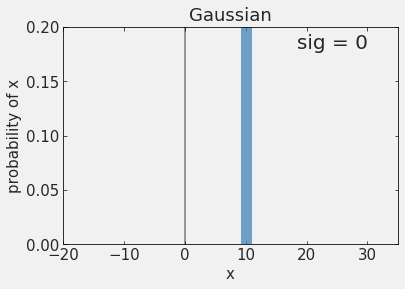

In [25]:
N=35
t = np.linspace(-N, N, N+1).astype(int)
y = np.zeros((21, ssize))
ls = np.zeros((21, len(t)))
mus = np.linspace(0, 20, 21).astype(int)
for i,j in enumerate(mus):
    #print(mus[i])
    y[i] = sp.stats.norm.rvs(size=ssize, loc=10, scale=mus[i])
    ls[i] = sp.stats.norm.pdf(t, loc=10, scale=mus[i])
    #pl.figure()
    #pl.hist(y[i])
fig, ax = pl.subplots()
ax.axis([-20, N, 0, 0.2])
bins = t

y0 = np.histogram(y[0], bins=bins, density=1)[0]

n, bins, patches = plt.hist(y0, bins, density=1, 
                            facecolor='SteelBlue', alpha=0.75);
l,= ax.plot(t, ls[i])
texts = ax.text(0.70, 0.9,  'sig = %d'%mus[0], transform=ax.transAxes, 
               fontsize=20)
ax.plot([0, 0], [0, 0.4], 'k-', alpha=0.5)
ax.set_title("Gaussian")
ax.set_ylabel("probability of x")
ax.set_xlabel("x")

def animate(i):    
    n, _ = np.histogram(y[i], bins=bins, density=1)
    for rect, h in zip(patches, n):
        rect.set_height(h)
        l.set_data(t, ls[i])
    texts.set_text('sig = %d'%mus[i])
    return patches

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(y))
from IPython.display import HTML
HTML(ani.to_jshtml())
print(r"changing mu")

/Users/fbb/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1662: RuntimeWarning: divide by zero encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


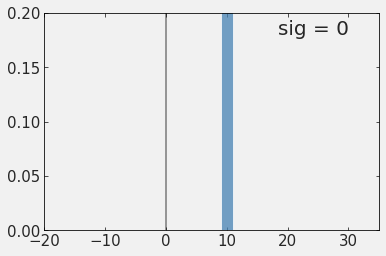

In [13]:
N=35
t = np.linspace(-N, N, N+1).astype(int)
y = np.zeros((21*10, ssize))
ls = np.zeros((21*10, len(t)))
mus = np.linspace(0, 20, 21*10).astype(int)
for i,j in enumerate(mus):
    #print(mus[i])
    y[i] = sp.stats.norm.rvs(size=ssize, loc=10, scale=mus[i])
    ls[i] = sp.stats.norm.pdf(t, loc=10, scale=mus[i])
    #pl.figure()
    #pl.hist(y[i])
fig, ax = pl.subplots()
ax.axis([-20, N, 0, 0.2])
bins = t

y0 = np.histogram(y[0], bins=bins, density=1)[0]

n, bins, patches = pl.hist(y0, bins, density=1, 
                            facecolor='SteelBlue', alpha=0.75);
l,= ax.plot(t, ls[i])
texts = ax.text(0.70, 0.9,  'sig = %d'%mus[0], transform=ax.transAxes, 
               fontsize=20)
ax.plot([0, 0], [0, 0.4], 'k-', alpha=0.5)
ax.set_title("Gaussian")
ax.set_ylabel("probability of x")
ax.set_xlabel("x")

def animate(i):    
    n, _ = np.histogram(y[i], bins=bins, density=1)
    for rect, h in zip(patches, n):
        rect.set_height(h)
    texts.set_text('sig = %d'%mus[i])
    l.set_data(t, ls[i])
    return patches

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(y))
from IPython.display import HTML
HTML(ani.to_jshtml())

# Chi Squared 

$x=\frac{1}{2^{\frac{k}{2}}\Gamma\left(\frac{k}{2}\right)}\\; x^{\frac{k}{2}-1} e^{-\frac{x}{2}}$

parameters:
    - k: degrees of freedom
the distribution of a sum of the squares of k independent standard normal random variables. The most common distribution in Null Hypothesis Rejection Testing

mean: k

variance: 2k

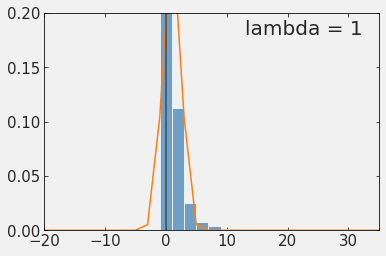

In [29]:
N=35
t = np.linspace(-N, N, N+1).astype(int)
y = np.zeros((20, ssize))
ls = np.zeros((20, len(t)))
lambdas = np.linspace(1, 20, 20).astype(int)
for i,j in enumerate(mus):
    #print(mus[i])
    y[i] = sp.stats.chi2.rvs(size=ssize, df=lambdas[i])
    ls[i] = sp.stats.norm.pdf(t, loc=lambdas[i], scale=np.sqrt(2 * lambdas[i]))
    #pl.figure()
    #pl.hist(y[i])
fig, ax = pl.subplots()
ax.axis([-20, N, 0, 0.2])
bins = t

y0 = np.histogram(y[0], bins=bins, density=1)[0]

n, bins, patches = pl.hist(y0, bins, density=1, 
                            facecolor='SteelBlue', alpha=0.75);
l,= ax.plot(t, ls[i])
texts = ax.text(0.60, 0.9,  'lambda = %d'%lambdas[0], transform=ax.transAxes, 
               fontsize=20)
ax.plot([0, 0], [0, 0.4], 'k-', alpha=0.5)

def animate(i):    
    n, _ = np.histogram(y[i], bins=bins, density=1)
    for rect, h in zip(patches, n):
        rect.set_height(h)
    texts.set_text('lambda = %d'%lambdas[i])
    l.set_data(t, ls[i])
    return patches

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(y))
from IPython.display import HTML
HTML(ani.to_jshtml())

# Uniform



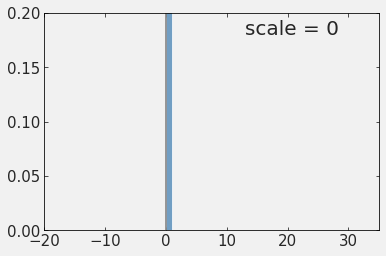

In [44]:
N=35
t = np.linspace(-N, N, N*2+1).astype(int)
y = np.zeros((21, ssize))
ls = np.zeros((21, len(t)))
lambdas = np.linspace(0, 20, 21).astype(int)
for i,j in enumerate(mus):
    #print(mus[i])
    y[i] = sp.stats.uniform.rvs(size=ssize, loc=0, scale=i)
fig, ax = pl.subplots()
ax.axis([-20, N, 0, 0.2])
bins = t

y0 = np.histogram(y[0], bins=bins, density=1)[0]

n, bins, patches = pl.hist(y0, bins, density=1, 
                            facecolor='SteelBlue', alpha=0.75);
texts = ax.text(0.60, 0.9,  'scale = %d'%lambdas[0], transform=ax.transAxes, 
               fontsize=20)
ax.plot([0, 0], [0, 0.4], 'k-', alpha=0.5)

def animate(i):    
    n, _ = np.histogram(y[i], bins=bins, density=1)
    for rect, h in zip(patches, n):
        rect.set_height(h)
    texts.set_text('scale = %d'%lambdas[i])
    l.set_data(t, ls[i])
    return patches

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(y))
from IPython.display import HTML
HTML(ani.to_jshtml())

In [32]:
sp.stats.uniform?